In [2]:
cd ../TileEM/

/srv/data/home/jlee782/crowd-seg/analysis/TileEM


In [3]:
%pylab inline
%load_ext autoreload
%autoreload 2
from paper_visualizations import * 
from PixelEM import * 
from test_sample import test_sample_obj
import json
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [6]:
ls -d */

experiment_result//  OldGammaTileCode//  sample//       Vision-stuff//
final_run//          pixel_em//          uniqueTiles//


In [9]:
ls uniqueTiles/10workers_rand0/worker1.pkl

uniqueTiles/10workers_rand0/worker1.pkl


In [7]:
ls uniqueTiles/10workers_rand0/indMat1.pkl

uniqueTiles/10workers_rand0/indMat1.pkl


In [53]:
batch = "10workers_rand0"
objid = 1
worker_lst = pkl.load(open("uniqueTiles/{}/worker{}.pkl".format(batch,objid)))
indMat = pkl.load(open("uniqueTiles/{}/indMat{}.pkl".format(batch,objid)))

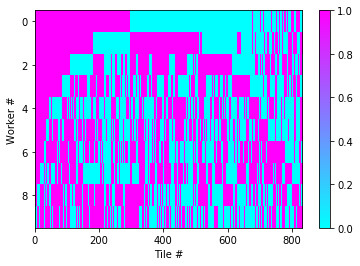

In [54]:
plt.ylabel("Worker #")
plt.xlabel("Tile #")
plt.imshow(indMat[:-1],cmap="cool",interpolation='none', aspect='auto')
plt.colorbar()

In [55]:
worker_keys,tidxs = np.where(indMat[:-1]!=0)

In [45]:
# [batch, objid, workerID, tileID, tile area, tile overlap with GT]

In [114]:
Tile_PR = pd.read_csv("Tile_PR_all.csv",index_col=0)

In [118]:
Tile_PR.keys()

Index([u'object_id', u'P [TileEM thres=-40]', u'R [TileEM thres=-40]',
       u'J [TileEM thres=-40]', u'P [TileEM thres=-20]',
       u'R [TileEM thres=-20]', u'J [TileEM thres=-20]', u'P [TileEM thres=0]',
       u'R [TileEM thres=0]', u'J [TileEM thres=0]', u'P [TileEM thres=20]',
       u'R [TileEM thres=20]', u'J [TileEM thres=20]', u'P [TileEM thres=40]',
       u'R [TileEM thres=40]', u'J [TileEM thres=40]', u'P [MVT]', u'R [MVT]',
       u'J [MVT]', u'Nworker', u'batch_num'],
      dtype='object')

In [128]:
ls *.csv

cleaned_ground_truth_rerun_full_PRJ_table_invariant_fixed.csv
cleaned_ground_truth_rerun_full_PRJ_table_invariant_GTLSA_fixed.csv
cleaned_rerun_ground_truth_prj.csv
concat_sample10_PR.csv
concat_sample15_PR.csv
concat_sample20_PR.csv
concat_sample25_PR.csv
concat_sample30_PR.csv
concat_sample5_PR.csv
ground_truth_experiment.csv
ground_truth_experiment_refined.csv
my_ground_truth.csv
Pixel_PR.csv
Tile_PR_all.csv
updated_Pixel_PR.csv


In [133]:
computed_GT_info =  pd.read_csv("../computed_my_COCO_BBvals.csv",index_col=0)

In [147]:
keys=['Num Points','Area Ratio','Precision [Self]','Recall [Self]','Jaccard [Self]','TPR [Self]','FNR [Self]','TNR [Self]', 'FPR [Self]']

In [140]:
computed_GT_info.head()[keys]

,Precision [Self],Recall [Self],Jaccard [Self],TPR [Self],FNR [Self],TNR [Self],FPR [Self]
33,0.974006,0.849733,0.830891,0.849733,0.022677,0.999605,0.000395
38,0.905966,0.926102,0.844888,0.926102,0.096125,0.986492,0.013508
39,0.976927,0.925391,0.905598,0.925391,0.021856,0.994770,0.005230
40,0.986032,0.932378,0.920223,0.932378,0.013208,0.999593,0.000407
41,0.975932,0.956878,0.934818,0.956878,0.023598,0.999118,0.000882


In [146]:
computed_GT_info

,object_id,worker_id,x_locs,y_locs,Num Points,Area Ratio,Jaccard [Self],Precision [Self],Recall [Self],F1 [COCO],...,FPR [Self],Jaccard [COCO],Precision [COCO],Recall [COCO],Union [COCO],Intersection [COCO],TPR [COCO],FNR [COCO],TNR [COCO],FPR [COCO]
33,45,68,"[103, 105, 98, 71, 50, 44, 44, 72, 91, 98, 104]","[152, 204, 208, 208, 208, 200, 145, 135, 139, ...",11,0.014950,0.830891,0.974006,0.849733,0.907636,...,0.000395,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
38,20,4,"[488, 492, 413, 361, 347, 410]","[178, 354, 360, 331, 179, 177]",6,0.125952,0.844888,0.905966,0.926102,0.915923,...,0.013508,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
39,18,6,"[107, 309, 312, 107]","[173, 170, 337, 343]",4,0.182915,0.905598,0.976927,0.925391,0.950461,...,0.005230,0.890147,0.990753,0.897604,38172.766457,33979.371893,0.897604,0.008377,0.997881,0.002119
40,9,7,"[259, 258, 288, 299, 305, 352, 348, 354, 362, ...","[217, 268, 269, 284, 287, 282, 276, 273, 279, ...",14,0.028253,0.920223,0.986032,0.932378,0.958455,...,0.000407,0.939638,0.992749,0.946131,9189.107475,8634.437925,0.946131,0.006910,0.999789,0.000211
41,13,7,"[255, 289, 296, 301, 301, 305, 302, 301, 307, ...","[269, 272, 278, 286, 294, 303, 318, 325, 328, ...",18,0.035317,0.934818,0.975932,0.956878,0.966311,...,0.000882,0.917241,0.985232,0.930028,11677.884921,10711.439779,0.930028,0.013941,0.999458,0.000542
42,20,8,"[106, 305, 309, 114]","[172, 171, 333, 340]",4,0.173488,0.000000,0.000000,0.000000,0.000000,...,0.197868,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
43,14,9,"[457, 463, 469, 477, 483, 492, 500, 514, 527, ...","[234, 219, 209, 198, 198, 207, 216, 210, 206, ...",59,0.068271,0.904438,0.917531,0.984467,0.949821,...,0.006013,0.905317,0.950635,0.949977,22022.856199,19937.657501,0.949977,0.049331,0.996383,0.003617
44,12,8,"[300, 402, 387, 381, 333, 311, 309, 307]","[287, 436, 441, 439, 357, 327, 309, 320]",8,0.007673,0.789606,0.973313,0.807079,0.882435,...,0.000207,0.669440,0.974014,0.681614,3436.635705,2300.621945,0.681614,0.018185,0.999798,0.000202
45,18,9,"[134, 196, 258, 308, 313, 306, 274, 264, 252, ...","[170, 170, 170, 169, 258, 330, 338, 337, 352, ...",15,0.190565,0.954205,0.983064,0.970153,0.976566,...,0.004000,0.935394,0.995357,0.939493,38021.532801,35565.105549,0.939493,0.004382,0.998891,0.001109
47,9,11,"[257, 284, 305, 321, 344, 352, 360, 372, 383, ...","[216, 207, 203, 200, 194, 194, 205, 218, 233, ...",21,0.030876,0.911261,0.938171,0.969484,0.953570,...,0.001968,0.915007,0.936567,0.975458,9728.972195,8902.073205,0.975458,0.066067,0.997982,0.002018


In [134]:
!head -n5  ../computed_my_COCO_BBvals.csv

,object_id,worker_id,x_locs,y_locs,Num Points,Area Ratio,Jaccard [Self],Precision [Self],Recall [Self],F1 [COCO],Union [Self],Intersection [Self],TPR [Self],FNR [Self],TNR [Self],FPR [Self],Jaccard [COCO],Precision [COCO],Recall [COCO],Union [COCO],Intersection [COCO],TPR [COCO],FNR [COCO],TNR [COCO],FPR [COCO]
33,45,68,"[103, 105, 98, 71, 50, 44, 44, 72, 91, 98, 104]","[152, 204, 208, 208, 208, 200, 145, 135, 139, 140, 146]",11.0,0.014949868267,0.830891047602,0.974006084897,0.849733474236,0.907635709607,4789.19814015,3979.30185985,0.849733474236,0.0226773735116,0.999604619038,0.000395380961645,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
38,20,4,"[488, 492, 413, 361, 347, 410]","[178, 354, 360, 331, 179, 177]",6.0,0.125952,0.844887973102,0.905965539381,0.92610246415,0.915923335639,25323.217822,21395.282178,0.92610246415,0.0961245675565,0.986491778634,0.0135082213657,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
39,18,6,"[107, 309, 312, 107]","[173, 170, 337, 343]",4.0,0.182914666667,0.

In [129]:
ls ../*csv

../computed_my_COCO_BBvals.csv  ../my_ground_truth.csv


In [215]:
worker_tbl = []
Tile_PR_keys = ['P [MVT]', 'R [MVT]','J [MVT]']
GT_info_keys = ['Num Points','Area Ratio','Precision [Self]','Recall [Self]','Jaccard [Self]','TPR [Self]','FNR [Self]','TNR [Self]', 'FPR [Self]']
for batch in ['5workers_rand0','10workers_rand0','15workers_rand0','20workers_rand0','25workers_rand0','30workers_rand0']:
    Nworker = int(batch.split('workers')[0])
    batch_num = int(batch.split('rand')[-1])

    for objid in object_lst:
        worker_lst = pkl.load(open("uniqueTiles/{}/worker{}.pkl".format(batch,objid)))
        indMat = pkl.load(open("uniqueTiles/{}/indMat{}.pkl".format(batch,objid)))
#         worker_keys,tidxs = np.where(indMat[:-1]!=0)
        for worker_id in worker_lst:
#         for worker_key,tidx in zip(worker_keys,tidxs):
            try:
                MV_P, MV_R, MV_J = Tile_PR[(Tile_PR["object_id"]==objid)&(Tile_PR["Nworker"]==Nworker)&(Tile_PR["batch_num"]==batch_num)][Tile_PR_keys].values[0]
            except(IndexError):
                #More Tile stuff skipped because they might not have been computed since intersection issue and stuff
#                 print "skipped object ",objid, Nworker,batch_num
                pass
#             worker_id = worker_lst[worker_key]
            try:
                numPts,area_ratio, P,R,J,TPR,FNR,TNR,FPR = computed_GT_info[(computed_GT_info["object_id"]==objid)&(computed_GT_info["worker_id"]==worker_id)][GT_info_keys].values[0]
            except(IndexError):
#                 print "skipped object2 ",objid, Nworker,batch_num
                pass
            worker_tbl.append([batch,objid,worker_id ,MV_P,MV_R, MV_J,numPts,area_ratio, P,R,J,TPR,FNR,TNR,FPR])

worker_tbl = pd.DataFrame(worker_tbl,columns=["batch","objid","worker id",'P [MVT]', 'R [MVT]','J [MVT]','Num Points','Area Ratio','P [GT]','R [GT]','J [GT]','TPR [GT]','FNR [GT]','TNR [GT]', 'FPR [GT]'])


In [218]:
worker_tbl.to_csv("all_worker_response_info.csv")

In [ ]:
object_lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47]
tile_tbl =[]
for batch in ['5workers_rand0','10workers_rand0','15workers_rand0','20workers_rand0','25workers_rand0','30workers_rand0']:
    for objid in object_lst:
        vtiles = pkl.load(open("uniqueTiles/{}/vtiles{}.pkl".format(batch,objid)))
        for tidx in range(len(vtiles)):
            tile = vtiles[tidx]
            gt = ground_truth_T(objid)
            try:
                if tile.intersects(gt):
                    overlap_frac  = overlap(tile,gt)
                else:
                    overlap_frac  = 0
            except(shapely.geos.TopologicalError):
                overlap_frac=-1
            tarea = tile.area
            tile_tbl.append([batch,objid,tidx,tarea,overlap_frac])

TopologyException: found non-noded intersection between LINESTRING (205 320, 207 322.333) and LINESTRING (213.471 318.412, 206.149 321.34) at 206.14893617021278 321.34042553191489
TopologyException: found non-noded intersection between LINESTRING (261.933 347.6, 262.25 344.75) and LINESTRING (262 347, 262 345) at 262 347.00000000000006
TopologyException: found non-noded intersection between LINESTRING (348.047 151.233, 352.2 153.2) and LINESTRING (350.3 152.3, 349.635 151.985) at 349.90672531338151 152.11371199054912
TopologyException: found non-noded intersection between LINESTRING (312 151, 309.143 156.714) and LINESTRING (309.143 156.714, 311.929 151.143) at 310.58386837881221 153.83226324237557
TopologyException: found non-noded intersection between LINESTRING (187.455 323, 186.182 321) and LINESTRING (186.182 321, 187.29 322.742) at 187.2752066115703 322.7181818181819
TopologyException: found non-noded intersection between LINESTRING (226.732 427.927, 245.364 417.576) and LINESTRI

In [96]:
tile_tbl = pd.DataFrame(tile_tbl,columns=["batch","objid","tile id","tile area", "gt overlap fraction"])

In [97]:
tile_tbl

,batch,objid,tile id,tile area,gt overlap fraction
0,5workers_rand0,1,0,23864.175396,9.191937e-01
1,5workers_rand0,1,1,0.916667,3.549944e-05
2,5workers_rand0,1,2,21.917919,7.816769e-04
3,5workers_rand0,1,3,1.825921,0.000000e+00
4,5workers_rand0,1,4,9.101256,3.524613e-04
5,5workers_rand0,1,5,57.696005,2.209915e-03
6,5workers_rand0,1,6,0.025000,9.681667e-07
7,5workers_rand0,1,7,75.580817,2.926993e-03
8,5workers_rand0,1,8,16.077456,5.952546e-04
9,5workers_rand0,1,9,6.725510,2.604566e-04
